---
# **Table of Contents**
---

**1.** [**Introduction**](#Section1)<br>
**2.** [**Problem Statement**](#Section2)<br>
**3.** [**Installing & Importing Libraries**](#Section3)<br>
  - **3.1** [**Importing Libraries**](#Section33)

**4.** [**Data Acquisition**](#Section4)<br>
**5** [**Data Information & Pre-Processing**](#Section41)

**6.** [**Feature Extraction**](#Section5)<br>
**7.** [**Exploratory Data Analysis**](#Section6)<br>
 
**8.** [**Base Model**](#Section7)<br>
  - **8.1** [**Logistic Regression**](#Section71)<br> 
  - **8.2** [**Random Forest**](#Section72)<br>
  - **8.3** [**Gradient Boosting**](#Section73)<br>
  
**9.** [**Model with WOE**](#Section7)<br>
  - **8.1** [**Logistic Regression**](#Section71)<br> 
  - **8.2** [**Random Forest**](#Section72)<br>
  - **8.3** [**Gradient Boosting**](#Section73)<br>
  
  
**10.** [**Model with WOE**](#Section7)<br>
  - **10.1** [**Logistic Regression**](#Section71)<br> 
  - **10.2** [**Random Forest**](#Section72)<br>
  - **10.3** [**Gradient Boosting**](#Section73)<br>

**11.** [**Model Evaluation & Tuning**](#Section8)<br>
  - **11.1** [**Model Evaluation**](#Section9)<br>
  - **11.2** [**Model Tuning**](#Section9)<br>
  - **11.3** [**Model with Emportant Features only**](#Section91)<br>

**12.** [**Conclusion**](#Section8)<br>

## **1. Introduction**

Provider Fraud is one of the biggest problems facing Medicare. According to the government, the total Medicare spending increased exponentially due to frauds in Medicare claims. Healthcare fraud is an organized crime which involves peers of providers, physicians, beneficiaries acting together to make fraud claims.

Rigorous analysis of Medicare data has yielded many physicians who indulge in fraud. They adopt ways in which an ambiguous diagnosis code is used to adopt costliest procedures and drugs. Insurance companies are the most vulnerable institutions impacted due to these bad practices. Due to this reason, insurance companies increased their insurance premiums and as result healthcare is becoming costly matter day by day.

Healthcare fraud and abuse take many forms. Some of the most common types of frauds by providers are:

a) Billing for services that were not provided.

b) Duplicate submission of a claim for the same service.

c) Misrepresenting the service provided.

d) Charging for a more complex or expensive service than was actually provided.

e) Billing for a covered service when the service actually provided was not covered.


## **2. Problem Statement**
The goal of this project is to " predict the potentially fraudulent providers " based on the claims filed by them.along with this, we will also discover important variables helpful in detecting the behaviour of potentially fraud providers. further, we will study fraudulent patterns in the provider's claims to understand the future behaviour of providers.
<center><img src="https://raw.githubusercontent.com/S-V-Singh/MachineLearningUsingPython/main/HealthCare/Images/Provider%20Fraud.jpeg"></center>

## **3. Importing Libraries**

In [1]:
#------------------------------------------------------------------------------------------------------------------------------
import pandas as pd                                                 # Importing for panel data analysis
import sweetviz as sv                                               # Import Sweetviz (To generate Visualization report)
pd.set_option('display.max_columns', None)                          # Unfolding hidden features if the cardinality is high
pd.set_option('display.max_rows', None)                             # Unfolding hidden data points if the cardinality is high
pd.set_option('mode.chained_assignment', None)                      # Removing restriction over chained assignments operations
#-------------------------------------------------------------------------------------------------------------------------------
import numpy as np                                                  # Importing package numpys (For Numerical Python)
from scipy.stats import randint as sp_randint                       # For initializing random integer values
#----------------------------------------------------------------------------------------------------------------------
import opendatasets as od                                           #Import OpenDataSets
#-------------------------------------------------------------------------------------------------------------------------------
import matplotlib.pyplot as plt                                     # Importing pyplot interface using matplotlib
import seaborn as sns                                               # Importin seaborm library for interactive visualization
%matplotlib inline
#-------------------------------------------------------------------------------------------------------------------------------
from sklearn.preprocessing import StandardScaler                    # To scaled data with mean 0 and variance 1
from sklearn.preprocessing import LabelEncoder                      # Import Label Encoder
from sklearn.model_selection import train_test_split                # To split the data in training and testing part
from sklearn.model_selection import RandomizedSearchCV              # To find best hyperparamter setting for the algorithm
from sklearn.ensemble import RandomForestClassifier                 # To implement random forest classifier
from sklearn.tree import DecisionTreeClassifier                     # To implement decision tree classifier
from sklearn.metrics import classification_report                   # To generate classification report
from sklearn.metrics import plot_confusion_matrix                   # To plot confusion matrix
from yellowbrick.model_selection import FeatureImportances
from sklearn.feature_selection import SelectFromModel
#import pydotplus                                                    # To generate pydot file
from IPython.display import Image                                   # To generate image using pydot file

from imblearn.over_sampling import SMOTE   
#-------------------------------------------------------------------------------------------------------------------------------
import warnings                                                     # Importing warning to disable runtime warnings
warnings.filterwarnings("ignore")                                   # Warnings will appear only once

## **4. Data Acquisition**

#### For the purpose of this project, we are considering Train_Inpatientdata claims, Train_Outpatientdata claims and Train_Beneficiarydata details of each provider. Lets s see their details :

A) Train_Inpatientdata Data

This data provides insights about the claims filed for those patients who are admitted in the hospitals. It also provides additional details like their admission and discharge dates and admit d diagnosis code.

B) Train_Outpatientdata Data

This data provides details about the claims filed for those patients who visit hospitals and not admitted in it.

C) Train_Beneficiarydata Details Data

This data contains Train_Beneficiarydata KYC details like health conditions,regioregion they belong to etc.

##### Note :- Testing Data does not have output variable (Potential Fraud), therefore we cannot measure the accuracy of the testing data. That is why I am using only Training Data for Modelling.

In [2]:
# Download Data from Kaggle
od.download("https://www.kaggle.com/rohitrox/healthcare-provider-fraud-detection-analysis")

Skipping, found downloaded files in ".\healthcare-provider-fraud-detection-analysis" (use force=True to force download)


In [3]:
# Read Data
Train_Beneficiarydata = pd.read_csv("C:/Users/HP/Desktop/Provider/Train_Beneficiarydata.csv")
Train_Inpatientdata = pd.read_csv("C:/Users/HP/Desktop/Provider/Train_Inpatientdata.csv")
Train_Outpatientdata = pd.read_csv("C:/Users/HP/Desktop/Provider/Train_Outpatientdata.csv")
Train = pd.read_csv("C:/Users/HP/Desktop/Provider/Train.csv")

## **5. Data Information**

### 5.1 Train_Beneficiarydata

In [ ]:
Train_Beneficiarydata.info()

#### Data Manipulation - Train_Beneficiarydata

In [4]:
# Convert DOB and DOD in Date format
Train_Beneficiarydata['DOB']=pd.to_datetime(Train_Beneficiarydata['DOB'])
Train_Beneficiarydata['DOD']=pd.to_datetime(Train_Beneficiarydata['DOD'])

In [5]:
# Fill DOD Null Values
datestamp=pd.to_datetime('31/12/2009',format = '%d/%m/%Y')
Train_Beneficiarydata['DOD']=Train_Beneficiarydata['DOD'].fillna(datestamp)

### Train_Inpatientdata & Outpatinet Data

In [6]:
Train_Inpatientdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40474 entries, 0 to 40473
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   BeneID                  40474 non-null  object 
 1   ClaimID                 40474 non-null  object 
 2   ClaimStartDt            40474 non-null  object 
 3   ClaimEndDt              40474 non-null  object 
 4   Provider                40474 non-null  object 
 5   InscClaimAmtReimbursed  40474 non-null  int64  
 6   AttendingPhysician      40362 non-null  object 
 7   OperatingPhysician      23830 non-null  object 
 8   OtherPhysician          4690 non-null   object 
 9   AdmissionDt             40474 non-null  object 
 10  ClmAdmitDiagnosisCode   40474 non-null  object 
 11  DeductibleAmtPaid       39575 non-null  float64
 12  DischargeDt             40474 non-null  object 
 13  DiagnosisGroupCode      40474 non-null  object 
 14  ClmDiagnosisCode_1      40474 non-null

In [7]:
Train_Outpatientdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517737 entries, 0 to 517736
Data columns (total 27 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   BeneID                  517737 non-null  object 
 1   ClaimID                 517737 non-null  object 
 2   ClaimStartDt            517737 non-null  object 
 3   ClaimEndDt              517737 non-null  object 
 4   Provider                517737 non-null  object 
 5   InscClaimAmtReimbursed  517737 non-null  int64  
 6   AttendingPhysician      516341 non-null  object 
 7   OperatingPhysician      90617 non-null   object 
 8   OtherPhysician          195046 non-null  object 
 9   ClmDiagnosisCode_1      507284 non-null  object 
 10  ClmDiagnosisCode_2      322357 non-null  object 
 11  ClmDiagnosisCode_3      203257 non-null  object 
 12  ClmDiagnosisCode_4      125596 non-null  object 
 13  ClmDiagnosisCode_5      74344 non-null   object 
 14  ClmDiagnosisCode_6  

### Data Manipulation - Train_Inpatient & Outpatient data

In [8]:
Train_Inpatientdata['DeductibleAmtPaid'].fillna(Train_Inpatientdata['DeductibleAmtPaid'].mode()[0],inplace=True)

In [9]:
Train_Outpatientdata['ClmDiagnosisCode_1'].fillna(Train_Outpatientdata['ClmDiagnosisCode_1'].mode()[0],inplace=True)

In [10]:
Train_Outpatientdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517737 entries, 0 to 517736
Data columns (total 27 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   BeneID                  517737 non-null  object 
 1   ClaimID                 517737 non-null  object 
 2   ClaimStartDt            517737 non-null  object 
 3   ClaimEndDt              517737 non-null  object 
 4   Provider                517737 non-null  object 
 5   InscClaimAmtReimbursed  517737 non-null  int64  
 6   AttendingPhysician      516341 non-null  object 
 7   OperatingPhysician      90617 non-null   object 
 8   OtherPhysician          195046 non-null  object 
 9   ClmDiagnosisCode_1      517737 non-null  object 
 10  ClmDiagnosisCode_2      322357 non-null  object 
 11  ClmDiagnosisCode_3      203257 non-null  object 
 12  ClmDiagnosisCode_4      125596 non-null  object 
 13  ClmDiagnosisCode_5      74344 non-null   object 
 14  ClmDiagnosisCode_6  

In [11]:
# To Find the common column between Train_Inpatientdata & Train_Outpatientdata
common_columns = [ids for ids in Train_Outpatientdata.columns if ids in Train_Inpatientdata.columns]
print(common_columns)

['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider', 'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician', 'OtherPhysician', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10', 'ClmProcedureCode_1', 'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5', 'ClmProcedureCode_6', 'DeductibleAmtPaid', 'ClmAdmitDiagnosisCode']


In [12]:
#### Merge Train_Inpatientdata & Outpatinet by OUter join at commom columns
Inp_Out_Merge = pd.merge(Train_Inpatientdata, Train_Outpatientdata, left_on = common_columns, right_on = common_columns,how = 'outer')

In [13]:
#### Removed IDs and columns having more null values.
remove_columns=['AttendingPhysician','OperatingPhysician', 'OtherPhysician','AdmissionDt','DischargeDt','ClmAdmitDiagnosisCode',
                'DiagnosisGroupCode','ClmDiagnosisCode_2', 'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4','ClmDiagnosisCode_5',
                'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7','ClmDiagnosisCode_8', 'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10',
                'ClmProcedureCode_1', 'ClmProcedureCode_2', 'ClmProcedureCode_3','ClmProcedureCode_4', 'ClmProcedureCode_5',
                'ClmProcedureCode_6']

In [14]:
Inp_Out_Merge.drop(remove_columns,axis=1,inplace=True)

### Provider Status (Train Data)

## **5. Data Pre Processing**

In [15]:
#### Merg Train_Inpatientdata Outpatinet DAtaFrame with Train_Beneficiarydata at BeneID
Inp_Out_Bene_Merge = pd.merge(Inp_Out_Merge, Train_Beneficiarydata, left_on = 'BeneID', right_on = 'BeneID', how = 'inner')

In [16]:
Final_DS = pd.merge(Inp_Out_Bene_Merge, Train, left_on = 'Provider', right_on='Provider', how='inner')

In [17]:
Final_DS['PotentialFraud'].replace({'No': 1},inplace=True)
Final_DS['PotentialFraud'].replace({'Yes': 2},inplace=True)

In [18]:
Final_DS.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 558211 entries, 0 to 558210
Data columns (total 33 columns):
 #   Column                           Non-Null Count   Dtype         
---  ------                           --------------   -----         
 0   BeneID                           558211 non-null  object        
 1   ClaimID                          558211 non-null  object        
 2   ClaimStartDt                     558211 non-null  object        
 3   ClaimEndDt                       558211 non-null  object        
 4   Provider                         558211 non-null  object        
 5   InscClaimAmtReimbursed           558211 non-null  int64         
 6   DeductibleAmtPaid                558211 non-null  float64       
 7   ClmDiagnosisCode_1               558211 non-null  object        
 8   DOB                              558211 non-null  datetime64[ns]
 9   DOD                              558211 non-null  datetime64[ns]
 10  Gender                           558211 non-

In [19]:
Final_DS['DeductibleAmtPaid'].unique()

array([1068.,    0.,   30.,  100.,   60.,   10.,   80.,   50.,   70.,
         40.,   20.,  200.,   90.,  876.,  865.,  886.,  897.])

In [20]:
Final_DS['ClaimStartDt']=pd.to_datetime(Final_DS['ClaimStartDt'])
Final_DS['ClaimEndDt']=pd.to_datetime(Final_DS['ClaimEndDt'])

In [ ]:
# An Automated Report provide insight about the Data.
Final_DS_report = sv.analyze(Final_DS)
Final_DS_report .show_html()

## 6. Extract New Features

In [21]:
Final_DS['Claim_Period']=Final_DS['ClaimEndDt']-Final_DS['ClaimStartDt']
Final_DS['Claim_Period']=Final_DS['Claim_Period']/np.timedelta64(1,'D')

In [22]:
Final_DS['Patient_Age']=Final_DS['DOD']-Final_DS['DOB']
Final_DS['Patient_Age']=Final_DS['Patient_Age']/np.timedelta64(1,'Y')

In [23]:
Final_DS.drop(['BeneID','ClaimID','RenalDiseaseIndicator','ClaimStartDt','ClaimEndDt','DOB','DOD'],axis=1,inplace =True) 

## **6. Exploratory Data Analysis**

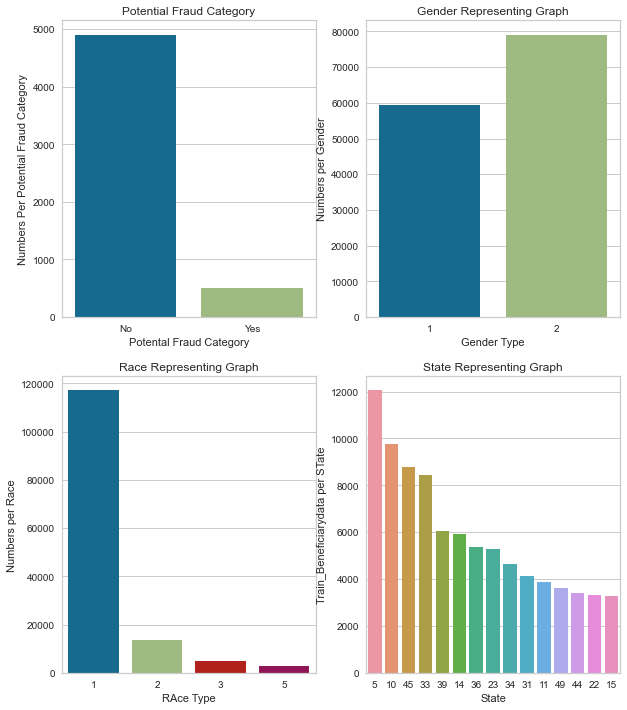

In [24]:
fig,ax=plt.subplots(2,2,figsize=(10,12))
sns.countplot(x='PotentialFraud',data=Train,ax=ax[0,0])
ax[0,0].set_xlabel('Potental Fraud Category')
ax[0,0].set_ylabel('Numbers Per Potential Fraud Category')
ax[0,0].set_title('Potential Fraud Category')

sns.countplot(x='Gender',data=Train_Beneficiarydata,ax=ax[0,1])
ax[0,1].set_xlabel('Gender Type')
ax[0,1].set_ylabel('Numbers per Gender')
ax[0,1].set_title('Gender Representing Graph')

sns.countplot(x='Race',data=Train_Beneficiarydata,ax=ax[1,0])
ax[1,0].set_xlabel('RAce Type')
ax[1,0].set_ylabel('Numbers per Race')
ax[1,0].set_title('Race Representing Graph')

#sns.countplot(x='State',data=Train_Beneficiarydata,ax=ax[1,0])
sns.countplot(x='State',data=Train_Beneficiarydata,order=Train_Beneficiarydata.State.value_counts().iloc[:15].index,ax=ax[1,1])
ax[1,1].set_xlabel('State')
ax[1,1].set_ylabel('Train_Beneficiarydata per STate')
ax[1,1].set_title('State Representing Graph');

In [25]:
Train_Outpatientdata=Train_Outpatientdata[Train_Outpatientdata['InscClaimAmtReimbursed']<3500]
Train_Inpatientdata=Train_Inpatientdata[Train_Inpatientdata['InscClaimAmtReimbursed']<60000]

In [26]:
Final_DS['ClmDiagnosisCode_1'].fillna(Final_DS['ClmDiagnosisCode_1'].mode()[0],inplace=True)

In [27]:
Final_DS.head(5)

,Provider,InscClaimAmtReimbursed,DeductibleAmtPaid,ClmDiagnosisCode_1,Gender,Race,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,PotentialFraud,Claim_Period,Patient_Age
0,PRV55912,26000,1068.0,1970,1,1,39,230,12,12,1,2,1,2,2,1,1,1,2,1,1,36000,3204,60,70,2,6.0,66.999322
1,PRV55912,50,0.0,V7183,1,1,39,310,12,12,1,1,1,2,2,2,2,1,2,2,2,24000,2136,450,200,2,0.0,77.668946
2,PRV55912,19000,1068.0,4240,2,1,39,230,12,12,1,1,1,2,1,2,2,1,2,2,2,19000,1068,100,20,2,12.0,96.084109
3,PRV55912,17000,1068.0,V5789,1,1,39,600,12,12,2,2,2,2,2,2,2,1,1,2,2,17000,1068,1050,540,2,18.0,87.251620
4,PRV55912,13000,1068.0,71535,2,1,39,280,12,12,2,1,2,2,1,2,1,1,1,1,2,27000,2136,450,160,2,4.0,79.503344


<AxesSubplot:xlabel='InscClaimAmtReimbursed', ylabel='Density'>

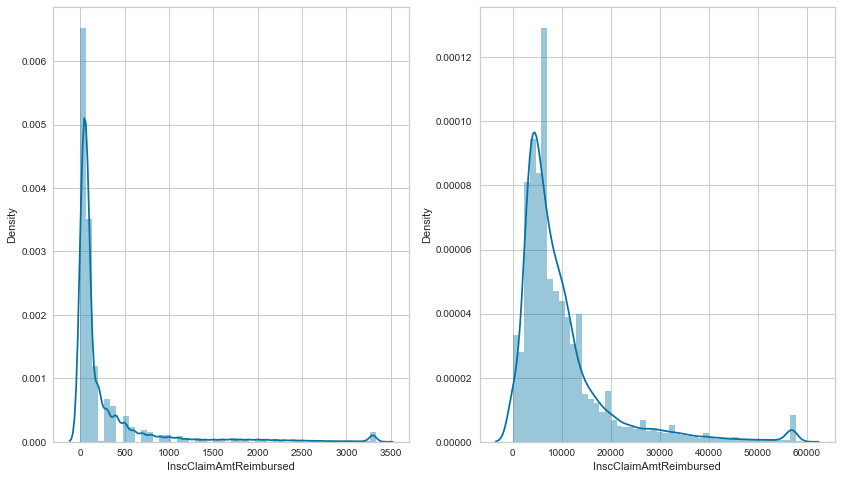

In [28]:
fig, axs = plt.subplots(figsize=(14,8),ncols=2)
import seaborn as sns

x=Train_Outpatientdata['InscClaimAmtReimbursed']
y=Train_Inpatientdata['InscClaimAmtReimbursed']
sns.distplot(x,ax=axs[0])
sns.distplot(y,ax=axs[1])

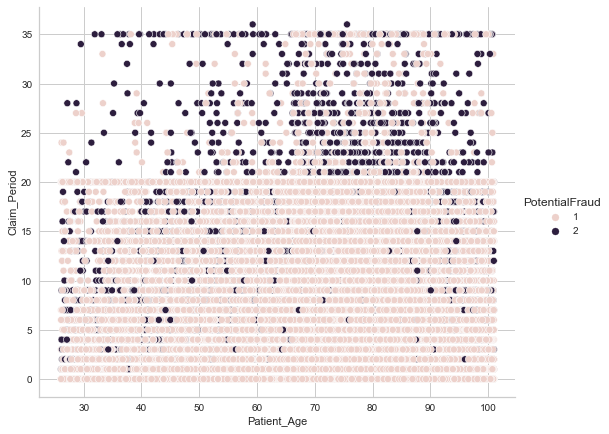

In [29]:
sns.relplot(data=Final_DS, x='Patient_Age', y='Claim_Period', kind='scatter',
            height=6, aspect=1.2, hue='PotentialFraud')

## **7. Base Model**

In [30]:
Final_DS_bsmodel=Final_DS.groupby(['PotentialFraud','Provider'],as_index=False).agg('sum')

In [31]:
Final_DS_bsmodel.head(5) # Claim_Daignosis code removed automatically because object type

,PotentialFraud,Provider,InscClaimAmtReimbursed,DeductibleAmtPaid,Gender,Race,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Claim_Period,Patient_Age
0,1,PRV51001,104640,5340.0,41,29,25,11500,300,300,35,31,33,45,40,41,29,27,44,42,44,440150,22428,65380,11598,36.0,1970.950807
1,1,PRV51004,52170,310.0,252,183,1848,48750,1768,1782,234,210,248,282,257,235,193,190,249,252,281,648430,64808,327040,92790,213.0,10766.939773
2,1,PRV51007,33710,3264.0,110,86,216,27030,852,852,118,104,122,132,128,115,95,93,123,122,132,219600,32040,124540,33820,69.0,4990.320130
3,1,PRV51008,35630,2316.0,67,52,183,26220,516,516,69,61,72,77,77,74,56,53,75,80,84,283460,26700,110530,26490,66.0,3252.614359
4,1,PRV51011,16630,1368.0,89,65,58,18570,696,696,91,79,91,112,95,85,75,72,96,100,114,256060,39108,81160,21270,32.0,4314.391124


In [32]:
X = Final_DS_bsmodel.drop(['PotentialFraud','Provider'],axis=1)
y = Final_DS_bsmodel['PotentialFraud']

### 8.1 Logistic Regression

#### Logistic regression is a statistical model that in its basic form uses a logistic function to model a binary dependent variable, although many more complex extensions exist. In regression analysis, logistic regression (or logit regression) is estimating the parameters of a logistic model (a form of binary regression)

Training Accuracy:  0.9325323475046211
Testing Accuracy:  0.9426987060998152

"------------------------Classfication Report------------------------"

              precision    recall  f1-score   support

           1       0.95      0.99      0.97       981
           2       0.80      0.51      0.63       101

    accuracy                           0.94      1082
   macro avg       0.88      0.75      0.80      1082
weighted avg       0.94      0.94      0.94      1082

"-------------------------Confusion Matrix-----------------------------"


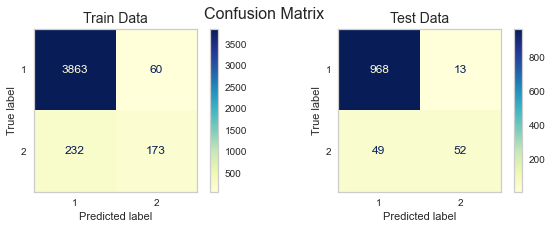

In [33]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import plot_confusion_matrix
#Model preparation
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)
#Scaling
sc = StandardScaler()
sc.fit(Xtrain)
Xtrain = sc.transform(Xtrain)
Xtest =sc.transform(Xtest)
#Model Development
lr = LogisticRegression()
lr.fit(Xtrain,ytrain)
y_preds=lr.predict(Xtest)
#Model Evaluation
print("\033[1mTraining Accuracy: \033[1m",lr.score(Xtrain,ytrain))
print("\033[1mTesting Accuracy: \033[1m",lr.score(Xtest,ytest))
print('\033[1m\n"------------------------Classfication Report------------------------"\n\033[1m')
print(classification_report(ytest,y_preds))
print('\033[1m"-------------------------Confusion Matrix-----------------------------\033[1m"')
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharex=False, figsize=(10, 3))
plot_confusion_matrix(estimator=lr, X=Xtrain, y_true=ytrain, values_format='.5g', cmap='YlGnBu', ax=ax1)
plot_confusion_matrix(estimator=lr, X=Xtest, y_true=ytest, values_format='.5g', cmap='YlGnBu', ax=ax2)
ax1.set_title(label='Train Data', size=14)
ax2.set_title(label='Test Data', size=14)
ax1.grid(b=False)
ax2.grid(b=False)
plt.suptitle(t='Confusion Matrix', size=16)
plt.show()

### 8.2. - Random Forest Classifier

##### A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and use averaging to improve the predictive accuracy and control over-fitting. The sub-sample size is always the same as the original input sample size but the samples are drawn with replacement .
##### Below are the trees produced by random forest model with 10 estimated trees with maximum depth of three for each tree. Each tree produced is slightly different from other.

Training Accuracy:  1.0
Testing Accuracy:  0.9426987060998152

"------------------------Classfication Report------------------------"

              precision    recall  f1-score   support

           1       0.96      0.98      0.97       981
           2       0.75      0.57      0.65       101

    accuracy                           0.94      1082
   macro avg       0.86      0.78      0.81      1082
weighted avg       0.94      0.94      0.94      1082

"-------------------------Confusion Matrix-----------------------------"


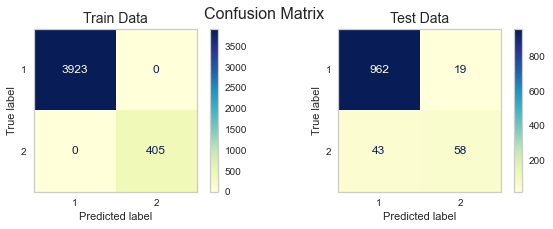

In [34]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import plot_confusion_matrix
#Model preparation
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)
#Scaling
sc = StandardScaler()
sc.fit(Xtrain)
Xtrain = sc.transform(Xtrain)
Xtest =sc.transform(Xtest)
#Model Development
clf_rf = RandomForestClassifier()
clf_rf.fit(Xtrain,ytrain)
y_preds=clf_rf.predict(Xtest)
#Model Evaluation
print("\033[1mTraining Accuracy: \033[1m",clf_rf.score(Xtrain,ytrain))
print("\033[1mTesting Accuracy: \033[1m",clf_rf.score(Xtest,ytest))
print('\033[1m\n"------------------------Classfication Report------------------------"\n\033[1m')
print(classification_report(ytest,y_preds))
print('\033[1m"-------------------------Confusion Matrix-----------------------------\033[1m"')
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharex=False, figsize=(10, 3))
plot_confusion_matrix(estimator=clf_rf, X=Xtrain, y_true=ytrain, values_format='.5g', cmap='YlGnBu', ax=ax1)
plot_confusion_matrix(estimator=clf_rf, X=Xtest, y_true=ytest, values_format='.5g', cmap='YlGnBu', ax=ax2)
ax1.set_title(label='Train Data', size=14)
ax2.set_title(label='Test Data', size=14)
ax1.grid(b=False)
ax2.grid(b=False)
plt.suptitle(t='Confusion Matrix', size=16)
plt.show()

### **8.3: Gradient Boosting**

#### Gradient boosting is a machine learning technique used in regression and classification tasks, among others. It gives a prediction model in the form of an ensemble of weak prediction models, which are typically decision trees.

Training Accuracy:  1.0
Testing Accuracy:  0.9426987060998152

"------------------------Classfication Report------------------------"

              precision    recall  f1-score   support

           1       0.96      0.98      0.97       981
           2       0.73      0.55      0.63       101

    accuracy                           0.94      1082
   macro avg       0.84      0.77      0.80      1082
weighted avg       0.93      0.94      0.94      1082

"-------------------------Confusion Matrix-----------------------------"


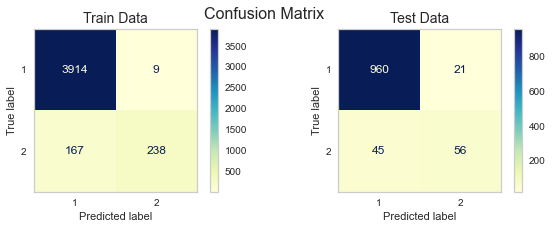

In [35]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import plot_confusion_matrix
#Model preparation
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)
#Scaling
sc = StandardScaler()
sc.fit(Xtrain)
Xtrain = sc.transform(Xtrain)
Xtest =sc.transform(Xtest)
#Model Development
clf_gb = GradientBoostingClassifier()
clf_gb.fit(Xtrain,ytrain)
y_preds=clf_gb.predict(Xtest)
#Model Evaluation
print("\033[1mTraining Accuracy: \033[1m",clf_rf.score(Xtrain,ytrain))
print("\033[1mTesting Accuracy: \033[1m",clf_rf.score(Xtest,ytest))
print('\033[1m\n"------------------------Classfication Report------------------------"\n\033[1m')
print(classification_report(ytest,y_preds))
print('\033[1m"-------------------------Confusion Matrix-----------------------------\033[1m"')
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharex=False, figsize=(10, 3))
plot_confusion_matrix(estimator=clf_gb, X=Xtrain, y_true=ytrain, values_format='.5g', cmap='YlGnBu', ax=ax1)
plot_confusion_matrix(estimator=clf_gb, X=Xtest, y_true=ytest, values_format='.5g', cmap='YlGnBu', ax=ax2)
ax1.set_title(label='Train Data', size=14)
ax2.set_title(label='Test Data', size=14)
ax1.grid(b=False)
ax2.grid(b=False)
plt.suptitle(t='Confusion Matrix', size=16)
plt.show()

## **9. Model with WOE**

### Weightage of EVidence (WOE)
#### Weight of evidence refers to a systematic approach that used to evaluate the totality of scientific evidence to assess if the science supports a particular conclusion.

In [36]:
Final_DS.head(5)

,Provider,InscClaimAmtReimbursed,DeductibleAmtPaid,ClmDiagnosisCode_1,Gender,Race,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,PotentialFraud,Claim_Period,Patient_Age
0,PRV55912,26000,1068.0,1970,1,1,39,230,12,12,1,2,1,2,2,1,1,1,2,1,1,36000,3204,60,70,2,6.0,66.999322
1,PRV55912,50,0.0,V7183,1,1,39,310,12,12,1,1,1,2,2,2,2,1,2,2,2,24000,2136,450,200,2,0.0,77.668946
2,PRV55912,19000,1068.0,4240,2,1,39,230,12,12,1,1,1,2,1,2,2,1,2,2,2,19000,1068,100,20,2,12.0,96.084109
3,PRV55912,17000,1068.0,V5789,1,1,39,600,12,12,2,2,2,2,2,2,2,1,1,2,2,17000,1068,1050,540,2,18.0,87.251620
4,PRV55912,13000,1068.0,71535,2,1,39,280,12,12,2,1,2,2,1,2,1,1,1,1,2,27000,2136,450,160,2,4.0,79.503344


In [54]:
Final_DS_temp=Final_DS.drop(['Gender','Race','State','County','ClmDiagnosisCode_1','PotentialFraud'],axis=1)

In [55]:
X_woe = Final_DS[['Gender','Race','State','County','ClmDiagnosisCode_1']]
y = Final_DS['PotentialFraud']

In [56]:
X_woe.head(5)

,Gender,Race,State,County,ClmDiagnosisCode_1
0,1,1,39,230,1970
1,1,1,39,310,V7183
2,2,1,39,230,4240
3,1,1,39,600,V5789
4,2,1,39,280,71535


In [40]:
from xverse.transformer import WOE
clf = WOE()
clf.fit(X_woe,y)

WOE(mono_custom_binning={'County': array([  0., 200., 490., 999.]),
                         'Gender': array([1, 2], dtype=int64),
                         'Race': array([1, 2, 3, 5], dtype=int64),
                         'State': array([ 1., 15., 34., 54.])},
    woe_bins={'ClmDiagnosisCode_1': {'0010': 0.2167139044344735,
                                     '0011': -0.5942163117818554,
                                     '0019': 0.09893086877808994,
                                     '0020': 0.3220744200922997,
                                     '0021': -0.4764332761254718, '0022': nan,
                                     '0023': nan...
                         Interval(490.0, 999.0, closed='right'): 0.01244451923591037},
              'Gender': {1: -0.0004966927840034283, 2: 0.00036166599394193033},
              'Race': {1: 0.004936232473705921, 2: 0.0325369496781742,
                       3: -0.12426150095601657, 5: -0.10230034237315687},
              'State': {Interval(

In [50]:
X_woe_tr= clf.transform(X_woe)

In [46]:
X_woe_tr.head(5)

,Gender,Race,State,County,ClmDiagnosisCode_1
0,-0.000497,0.004936,0.059249,-0.022847,-0.124213
1,-0.000497,0.004936,0.059249,-0.022847,-0.025122
2,0.000362,0.004936,0.059249,-0.022847,-0.051351
3,-0.000497,0.004936,0.059249,0.012445,-0.227850
4,0.000362,0.004936,0.059249,-0.022847,-0.210093


In [64]:
Final_DS_woe=pd.concat([Final_DS_temp,X_woe_tr,y],axis=1)

In [65]:
Final_DS_woe.head(5)

,Provider,InscClaimAmtReimbursed,DeductibleAmtPaid,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Claim_Period,Patient_Age,Gender,Race,State,County,ClmDiagnosisCode_1,PotentialFraud
0,PRV55912,26000,1068.0,12,12,1,2,1,2,2,1,1,1,2,1,1,36000,3204,60,70,6.0,66.999322,-0.000497,0.004936,0.059249,-0.022847,-0.124213,2
1,PRV55912,50,0.0,12,12,1,1,1,2,2,2,2,1,2,2,2,24000,2136,450,200,0.0,77.668946,-0.000497,0.004936,0.059249,-0.022847,-0.025122,2
2,PRV55912,19000,1068.0,12,12,1,1,1,2,1,2,2,1,2,2,2,19000,1068,100,20,12.0,96.084109,0.000362,0.004936,0.059249,-0.022847,-0.051351,2
3,PRV55912,17000,1068.0,12,12,2,2,2,2,2,2,2,1,1,2,2,17000,1068,1050,540,18.0,87.251620,-0.000497,0.004936,0.059249,0.012445,-0.227850,2
4,PRV55912,13000,1068.0,12,12,2,1,2,2,1,2,1,1,1,1,2,27000,2136,450,160,4.0,79.503344,0.000362,0.004936,0.059249,-0.022847,-0.210093,2


In [49]:
Final_DS_woe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 558211 entries, 0 to 558210
Data columns (total 28 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   Provider                         558211 non-null  object 
 1   InscClaimAmtReimbursed           558211 non-null  int64  
 2   DeductibleAmtPaid                558211 non-null  float64
 3   NoOfMonths_PartACov              558211 non-null  int64  
 4   NoOfMonths_PartBCov              558211 non-null  int64  
 5   ChronicCond_Alzheimer            558211 non-null  int64  
 6   ChronicCond_Heartfailure         558211 non-null  int64  
 7   ChronicCond_KidneyDisease        558211 non-null  int64  
 8   ChronicCond_Cancer               558211 non-null  int64  
 9   ChronicCond_ObstrPulmonary       558211 non-null  int64  
 10  ChronicCond_Depression           558211 non-null  int64  
 11  ChronicCond_Diabetes             558211 non-null  int64  
 12  Ch

In [59]:
#### Filling Claim Diagnosis code 1 with Mode value
Final_DS_woe['ClmDiagnosisCode_1'].fillna(Final_DS_woe['ClmDiagnosisCode_1'].mode()[0],inplace=True)

In [66]:
Final_DS_woemodel=Final_DS_woe.groupby(['PotentialFraud','Provider'],as_index=False).agg('sum')

In [67]:
Final_DS_woemodel.shape

(5410, 28)

In [71]:
X_2nd = Final_DS_woemodel.drop(['PotentialFraud','Provider'],axis=1)
y_2nd = Final_DS_woemodel['PotentialFraud']
#Model preparation
Xtrain, Xtest, ytrain, ytest = train_test_split(X_2nd, y_2nd, test_size=0.20, random_state=42)
#Scaling
sc = StandardScaler()
sc.fit(Xtrain)
Xtrain = sc.transform(Xtrain)
Xtest =sc.transform(Xtest)

### 9.1 Logistic Regression

#### Logistic regression is a statistical model that in its basic form uses a logistic function to model a binary dependent variable, although many more complex extensions exist. In regression analysis, logistic regression (or logit regression) is estimating the parameters of a logistic model (a form of binary regression)

Training Accuracy:  0.9662661737523105
Testing Accuracy:  0.9593345656192237

"------------------------Classfication Report------------------------"

              precision    recall  f1-score   support

           1       0.96      0.99      0.98       967
           2       0.93      0.67      0.78       115

    accuracy                           0.96      1082
   macro avg       0.94      0.83      0.88      1082
weighted avg       0.96      0.96      0.96      1082

"-------------------------Confusion Matrix-----------------------------"


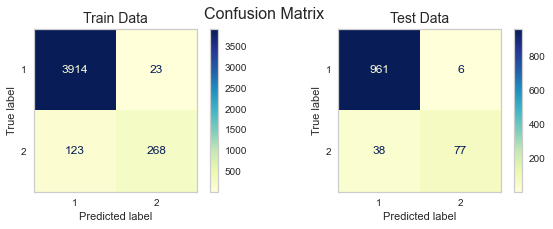

In [73]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import plot_confusion_matrix

#Model Development
lr_woe = LogisticRegression()
lr_woe.fit(Xtrain,ytrain)
y_preds=lr_woe.predict(Xtest)
#Model Evaluation
print("\033[1mTraining Accuracy: \033[1m",lr_woe.score(Xtrain,ytrain))
print("\033[1mTesting Accuracy: \033[1m",lr_woe.score(Xtest,ytest))
print('\033[1m\n"------------------------Classfication Report------------------------"\n\033[1m')
print(classification_report(ytest,y_preds))
print('\033[1m"-------------------------Confusion Matrix-----------------------------\033[1m"')
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharex=False, figsize=(10, 3))
plot_confusion_matrix(estimator=lr_woe, X=Xtrain, y_true=ytrain, values_format='.5g', cmap='YlGnBu', ax=ax1)
plot_confusion_matrix(estimator=lr_woe, X=Xtest, y_true=ytest, values_format='.5g', cmap='YlGnBu', ax=ax2)
ax1.set_title(label='Train Data', size=14)
ax2.set_title(label='Test Data', size=14)
ax1.grid(b=False)
ax2.grid(b=False)
plt.suptitle(t='Confusion Matrix', size=16)
plt.show()

### 9.2. - Random Forest Classifier

##### A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and use averaging to improve the predictive accuracy and control over-fitting. The sub-sample size is always the same as the original input sample size but the samples are drawn with replacement .
##### Below are the trees produced by random forest model with 10 estimated trees with maximum depth of three for each tree. Each tree produced is slightly different from other.

Training Accuracy:  1.0
Testing Accuracy:  0.9491682070240296

"------------------------Classfication Report------------------------"

              precision    recall  f1-score   support

           1       0.96      0.98      0.97       967
           2       0.83      0.66      0.73       115

    accuracy                           0.95      1082
   macro avg       0.89      0.82      0.85      1082
weighted avg       0.95      0.95      0.95      1082

"-------------------------Confusion Matrix-----------------------------"


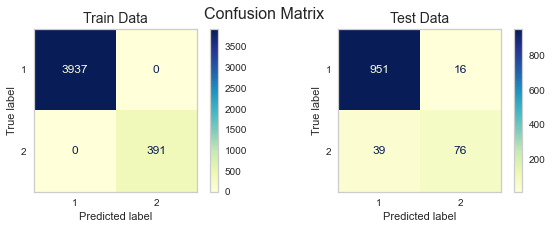

In [75]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import plot_confusion_matrix
#Model Development
clf_woe = RandomForestClassifier()
clf_woe.fit(Xtrain,ytrain)
y_preds=clf_woe.predict(Xtest)
#Model Evaluation
print("\033[1mTraining Accuracy: \033[1m",clf_woe.score(Xtrain,ytrain))
print("\033[1mTesting Accuracy: \033[1m",clf_woe.score(Xtest,ytest))
print('\033[1m\n"------------------------Classfication Report------------------------"\n\033[1m')
print(classification_report(ytest,y_preds))
print('\033[1m"-------------------------Confusion Matrix-----------------------------\033[1m"')
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharex=False, figsize=(10, 3))
plot_confusion_matrix(estimator=clf_woe, X=Xtrain, y_true=ytrain, values_format='.5g', cmap='YlGnBu', ax=ax1)
plot_confusion_matrix(estimator=clf_woe, X=Xtest, y_true=ytest, values_format='.5g', cmap='YlGnBu', ax=ax2)
ax1.set_title(label='Train Data', size=14)
ax2.set_title(label='Test Data', size=14)
ax1.grid(b=False)
ax2.grid(b=False)
plt.suptitle(t='Confusion Matrix', size=16)
plt.show()

### 9.3: Gradient Boosting

#### Gradient boosting is a machine learning technique used in regression and classification tasks, among others. It gives a prediction model in the form of an ensemble of weak prediction models, which are typically decision trees.

Training Accuracy:  0.9861367837338263
Testing Accuracy:  0.9510166358595195

"------------------------Classfication Report------------------------"

              precision    recall  f1-score   support

           1       0.96      0.98      0.97       967
           2       0.82      0.70      0.75       115

    accuracy                           0.95      1082
   macro avg       0.89      0.84      0.86      1082
weighted avg       0.95      0.95      0.95      1082

"-------------------------Confusion Matrix-----------------------------"


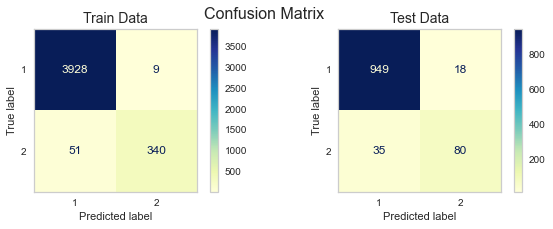

In [77]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import plot_confusion_matrix
#Model Development
clf_gb_woe = GradientBoostingClassifier()
clf_gb_woe.fit(Xtrain,ytrain)
y_preds=clf_gb_woe.predict(Xtest)
#Model Evaluation
print("\033[1mTraining Accuracy: \033[1m",clf_gb_woe.score(Xtrain,ytrain))
print("\033[1mTesting Accuracy: \033[1m",clf_gb_woe.score(Xtest,ytest))
print('\033[1m\n"------------------------Classfication Report------------------------"\n\033[1m')
print(classification_report(ytest,y_preds))
print('\033[1m"-------------------------Confusion Matrix-----------------------------\033[1m"')
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharex=False, figsize=(10, 3))
plot_confusion_matrix(estimator=clf_gb_woe, X=Xtrain, y_true=ytrain, values_format='.5g', cmap='YlGnBu', ax=ax1)
plot_confusion_matrix(estimator=clf_gb_woe, X=Xtest, y_true=ytest, values_format='.5g', cmap='YlGnBu', ax=ax2)
ax1.set_title(label='Train Data', size=14)
ax2.set_title(label='Test Data', size=14)
ax1.grid(b=False)
ax2.grid(b=False)
plt.suptitle(t='Confusion Matrix', size=16)
plt.show()

### 10 Model with Synthetic Minority Oversampling Technique (SMOTE) & WOE
#### Randomly pick a point from the minority class.
#### Compute the k-nearest neighbors (for some pre-specified k) for this point.
#### Add k new points somewhere between the chosen point and each of its neighbors

In [80]:
sm = SMOTE(random_state = 42)
X_sm, y_3rd = sm.fit_resample(X_2nd,y_2nd)
X_3rd = pd.DataFrame(data = X_sm, columns = X_sm.columns)
#Model Preparation
Xtrain, Xtest, ytrain, ytest = train_test_split(X_3rd, y_3rd, test_size = 0.2, random_state = 42)
#Scaling
sc = StandardScaler()
sc.fit(Xtrain)
Xtrain = sc.transform(Xtrain)
Xtest =sc.transform(Xtest)

### 10.1 Logistic Regression

Training Accuracy:  0.9244200866683661
Testing Accuracy:  0.9301732925586137

"------------------------Classfication Report------------------------"

              precision    recall  f1-score   support

           1       0.91      0.96      0.93      1000
           2       0.96      0.90      0.93       962

    accuracy                           0.93      1962
   macro avg       0.93      0.93      0.93      1962
weighted avg       0.93      0.93      0.93      1962

"-------------------------Confusion Matrix-----------------------------"


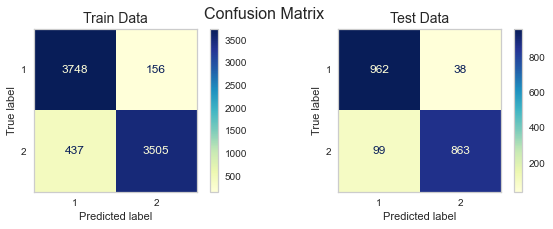

In [81]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import plot_confusion_matrix

#Model Development
clf_lr_woe_sm = LogisticRegression()
clf_lr_woe_sm.fit(Xtrain,ytrain)
y_preds=clf_lr_woe_sm.predict(Xtest)
#Model Evaluation
print("\033[1mTraining Accuracy: \033[1m",clf_lr_woe_sm.score(Xtrain,ytrain))
print("\033[1mTesting Accuracy: \033[1m",clf_lr_woe_sm.score(Xtest,ytest))
print('\033[1m\n"------------------------Classfication Report------------------------"\n\033[1m')
print(classification_report(ytest,y_preds))
print('\033[1m"-------------------------Confusion Matrix-----------------------------\033[1m"')
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharex=False, figsize=(10, 3))
plot_confusion_matrix(estimator=clf_lr_woe_sm, X=Xtrain, y_true=ytrain, values_format='.5g', cmap='YlGnBu', ax=ax1)
plot_confusion_matrix(estimator=clf_lr_woe_sm, X=Xtest, y_true=ytest, values_format='.5g', cmap='YlGnBu', ax=ax2)
ax1.set_title(label='Train Data', size=14)
ax2.set_title(label='Test Data', size=14)
ax1.grid(b=False)
ax2.grid(b=False)
plt.suptitle(t='Confusion Matrix', size=16)
plt.show()

### 10.2. - Random Forest Classifier

Training Accuracy:  1.0
Testing Accuracy:  0.9638124362895005

"------------------------Classfication Report------------------------"

              precision    recall  f1-score   support

           1       0.98      0.95      0.96      1000
           2       0.95      0.98      0.96       962

    accuracy                           0.96      1962
   macro avg       0.96      0.96      0.96      1962
weighted avg       0.96      0.96      0.96      1962

"-------------------------Confusion Matrix-----------------------------"


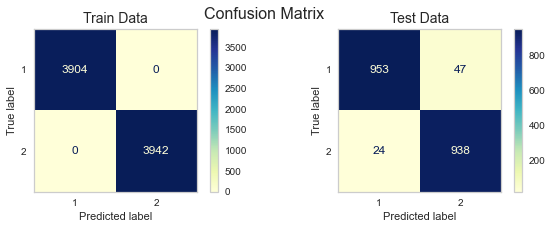

In [82]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import plot_confusion_matrix

#Model Development
clf_rf_woe_sm = RandomForestClassifier()
clf_rf_woe_sm.fit(Xtrain,ytrain)
y_preds=clf_rf_woe_sm.predict(Xtest)
#Model Evaluation
print("\033[1mTraining Accuracy: \033[1m",clf_rf_woe_sm.score(Xtrain,ytrain))
print("\033[1mTesting Accuracy: \033[1m",clf_rf_woe_sm.score(Xtest,ytest))
print('\033[1m\n"------------------------Classfication Report------------------------"\n\033[1m')
print(classification_report(ytest,y_preds))
print('\033[1m"-------------------------Confusion Matrix-----------------------------\033[1m"')
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharex=False, figsize=(10, 3))
plot_confusion_matrix(estimator=clf_rf_woe_sm, X=Xtrain, y_true=ytrain, values_format='.5g', cmap='YlGnBu', ax=ax1)
plot_confusion_matrix(estimator=clf_rf_woe_sm, X=Xtest, y_true=ytest, values_format='.5g', cmap='YlGnBu', ax=ax2)
ax1.set_title(label='Train Data', size=14)
ax2.set_title(label='Test Data', size=14)
ax1.grid(b=False)
ax2.grid(b=False)
plt.suptitle(t='Confusion Matrix', size=16)
plt.show()

### 10.3: Gradient Boosting

Training Accuracy:  0.9589599796074433
Testing Accuracy:  0.9439347604485219

"------------------------Classfication Report------------------------"

              precision    recall  f1-score   support

           1       0.91      0.96      0.93      1000
           2       0.96      0.90      0.93       962

    accuracy                           0.93      1962
   macro avg       0.93      0.93      0.93      1962
weighted avg       0.93      0.93      0.93      1962

"-------------------------Confusion Matrix-----------------------------"


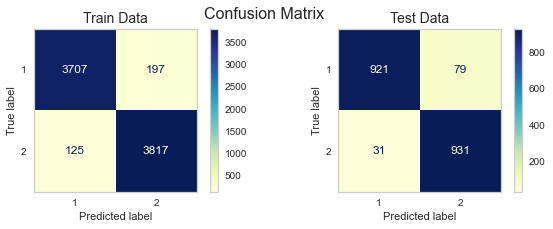

In [83]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import plot_confusion_matrix

#Model Development
clf_gb_woe_sm = GradientBoostingClassifier()
clf_gb_woe_sm.fit(Xtrain,ytrain)
y_preds=clf_lr_woe_sm.predict(Xtest)
#Model Evaluation
print("\033[1mTraining Accuracy: \033[1m",clf_gb_woe_sm.score(Xtrain,ytrain))
print("\033[1mTesting Accuracy: \033[1m",clf_gb_woe_sm.score(Xtest,ytest))
print('\033[1m\n"------------------------Classfication Report------------------------"\n\033[1m')
print(classification_report(ytest,y_preds))
print('\033[1m"-------------------------Confusion Matrix-----------------------------\033[1m"')
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharex=False, figsize=(10, 3))
plot_confusion_matrix(estimator=clf_gb_woe_sm, X=Xtrain, y_true=ytrain, values_format='.5g', cmap='YlGnBu', ax=ax1)
plot_confusion_matrix(estimator=clf_gb_woe_sm, X=Xtest, y_true=ytest, values_format='.5g', cmap='YlGnBu', ax=ax2)
ax1.set_title(label='Train Data', size=14)
ax2.set_title(label='Test Data', size=14)
ax1.grid(b=False)
ax2.grid(b=False)
plt.suptitle(t='Confusion Matrix', size=16)
plt.show()

## 11. **Model Evaluation & Tuning**

### 11.1 **Model Evaluation**

In [86]:
# As Model with WOE and SMOTE is the best data set having best score in all aspect. only evaluating the last model
import warnings
warnings.filterwarnings('ignore')
#Model Comparison
from sklearn import model_selection
lr = LogisticRegression()
rf = RandomForestClassifier(n_estimators=100)
gb = GradientBoostingClassifier(n_estimators=100)
models = []
models.append(('Logistic Regression',lr))
models.append(('Random Forest Classifier',rf))
models.append(('Gradient Boosting Classifier',gb))

Logistic Regression: 0.923496 (0.006093)
Random Forest Classifier: 0.964872 (0.005730)
Gradient Boosting Classifier: 0.944552 (0.007518)


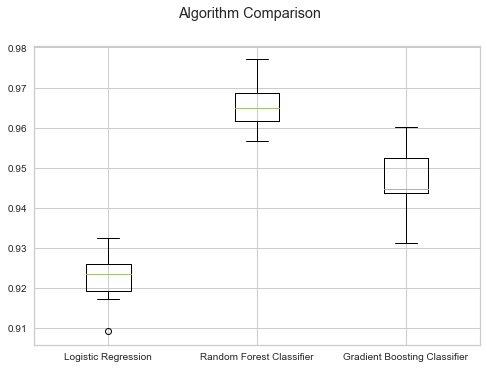

In [87]:
# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = model_selection.KFold(n_splits=10)
	cv_results = model_selection.cross_val_score(model, Xtrain, ytrain, cv=kfold,scoring='f1_macro')
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, np.median(cv_results), cv_results.std())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

### 11.2 **Model Tuning**

Automatically created module for IPython interactive environment


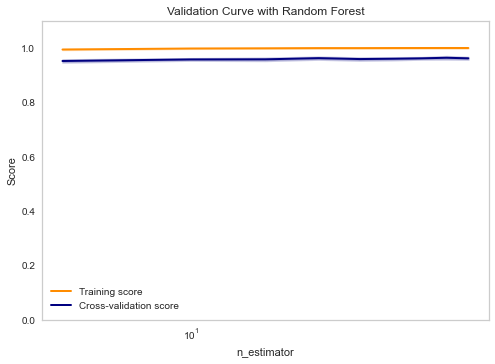

In [111]:
# As Randome Forest Classifier giving best results. Tuning only Random Forest Classifier of Model with smote and woe.
print(__doc__)
param_range=np.arange(0,50,5)
from sklearn.model_selection import validation_curve
train_scores, test_scores = validation_curve(RandomForestClassifier(), Xtrain, ytrain,
                                             param_name="n_estimators", param_range=param_range, n_jobs=1)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title("Validation Curve with Random Forest")
plt.xlabel("n_estimator")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.grid()
plt.show()

### 11.3 **Important Features**

In [91]:
selector=SelectFromModel(RandomForestClassifier(n_estimators=100,random_state=42, n_jobs=-1))
selector.fit(X_3rd,y_3rd)
selected_feat=X_3rd.columns[(selector.get_support())].tolist()

print('Total Features Selected are', len(selected_feat))

# Estimated by taking mean(default) of feature importance
print('Threshold set by Model:', np.round(selector.threshold_, decimals = 2))
print('Features:', selected_feat)

Total Features Selected are 6
Threshold set by Model: 0.04
Features: ['InscClaimAmtReimbursed', 'DeductibleAmtPaid', 'IPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt', 'Claim_Period', 'ClmDiagnosisCode_1']


## 12. **Conclusion**

#### Below is the best model considering run time or evaluation metrics, now we are working with important features only and we can see no difference from above model & this is tuned model at n_estimator =95 & random_state=95.Model prediciton is 97%. which is awesome.

In [118]:
X_final=X_3rd[['InscClaimAmtReimbursed','DeductibleAmtPaid','IPAnnualReimbursementAmt','IPAnnualDeductibleAmt','Claim_Period','ClmDiagnosisCode_1']]
y_final=y_3rd

Training Accuracy:  1.0
Testing Accuracy:  0.9663608562691132

"------------------------Classfication Report------------------------"

              precision    recall  f1-score   support

           1       0.98      0.95      0.97       979
           2       0.96      0.98      0.97       983

    accuracy                           0.97      1962
   macro avg       0.97      0.97      0.97      1962
weighted avg       0.97      0.97      0.97      1962

"-------------------------Confusion Matrix-----------------------------"


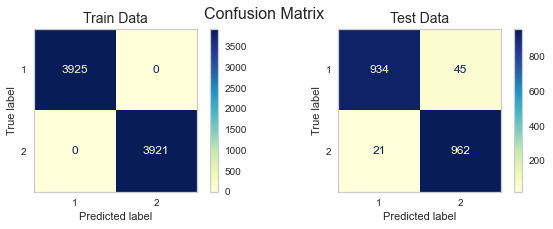

In [116]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import plot_confusion_matrix
#Model preparation
Xtrain, Xtest, ytrain, ytest = train_test_split(X_final, y_final, test_size=0.20, random_state=95)
#Scaling
sc = StandardScaler()
sc.fit(Xtrain)
Xtrain = sc.transform(Xtrain)
Xtest =sc.transform(Xtest)
#Model Development
clf_rf_final = RandomForestClassifier(n_estimators=95)
clf_rf_final.fit(Xtrain,ytrain)
y_preds=clf_rf_final.predict(Xtest)
#Model Evaluation
print("\033[1mTraining Accuracy: \033[1m",clf_rf_final.score(Xtrain,ytrain))
print("\033[1mTesting Accuracy: \033[1m",clf_rf_final.score(Xtest,ytest))
print('\033[1m\n"------------------------Classfication Report------------------------"\n\033[1m')
print(classification_report(ytest,y_preds))
print('\033[1m"-------------------------Confusion Matrix-----------------------------\033[1m"')
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharex=False, figsize=(10, 3))
plot_confusion_matrix(estimator=clf_rf_final, X=Xtrain, y_true=ytrain, values_format='.5g', cmap='YlGnBu', ax=ax1)
plot_confusion_matrix(estimator=clf_rf_final, X=Xtest, y_true=ytest, values_format='.5g', cmap='YlGnBu', ax=ax2)
ax1.set_title(label='Train Data', size=14)
ax2.set_title(label='Test Data', size=14)
ax1.grid(b=False)
ax2.grid(b=False)
plt.suptitle(t='Confusion Matrix', size=16)
plt.show()

In [119]:
# Cross Validation Score
scoresdt = cross_val_score(clf_rf_final,Xtrain,ytrain,cv=10,scoring='f1')
print(scoresdt)
print("Average f1")
print(np.mean(scoresdt))

[0.97135417 0.96324461 0.95336788 0.96923077 0.96464646 0.96373057
 0.97186701 0.96373057 0.95201038 0.96219035]
Average f1
0.9635372765351053
